In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras

In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [7]:
# Load data (deserialize)
with open('movesKen56.pickle', 'rb') as handle:
    unserialized_data = pickle.load(handle)


# Spliting into training, dev and test set using indexing
dataset_x = unserialized_data['dataset_x']
dataset_y = unserialized_data['dataset_y']
num_classes = np.unique(dataset_y).shape[0]
indexes = np.arange(dataset_x.shape[0])
np.random.shuffle(indexes)
train_index = indexes[: int(0.9 * dataset_x.shape[0])]
test_index  = indexes[int(0.9 * dataset_x.shape[0]) :]
train_x = dataset_x[train_index]
train_y = dataset_y[train_index]
test_x  = dataset_x[test_index]
test_y  = dataset_y[test_index]

In [8]:
# convert class vectors to binary class matrices
train_y = keras.utils.to_categorical(train_y, num_classes)
test_y  = keras.utils.to_categorical(test_y,  num_classes)
print(train_y.shape)
print(test_y.shape)

(1196, 10, 4)
(133, 10, 4)


In [9]:
model = tf.keras.models.load_model('movesSF256.h5')

In [10]:
test_loss, test_acc = model.evaluate(test_x,  test_y, batch_size=1, verbose=2)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

133/133 - 11s - loss: 0.0011 - acc: 0.9992
Test loss: 0.0011381651274859905
Test accuracy: 0.9992481470108032


In [11]:
# Get moves of name from indexing
def movesName(class_index):
    if   class_index == 0: return 'None'
    elif class_index == 1: return 'Hadoken'
    elif class_index == 2: return 'Shoryuken'
    elif class_index == 3: return 'Tatsumaki' # Tatsumaki Senpuu Kyaku

In [12]:
def predict(choice):
    result = model.predict(np.reshape(test_x[choice], (1, 10, 56, 56, 3)))

    # Displaying random choice of dataset
    plt.figure(figsize = (10,2))
    for i in range(test_x.shape[1]):
        img = test_x[choice][i]
        plt.subplot(1,test_x.shape[1],i+1)
        plt.gca().set_title(movesName(np.argmax(test_y[choice][i])))
        plt.imshow(img,  aspect='auto')
    plt.tight_layout()
    plt.show()
    return result

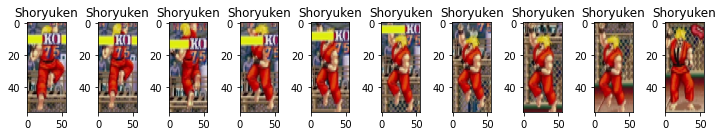

In [17]:
choice = np.random.choice(test_x.shape[0])
inference = predict(choice)

In [18]:
np.set_printoptions(suppress=True)
print("test_y :\t", np.argmax(test_y[choice], axis=1))
print("inference :\t", np.argmax(inference.squeeze(), axis=1))
print(inference)

test_y :	 [2 2 2 2 2 2 2 2 2 2]
inference :	 [2 2 2 2 2 2 2 2 2 2]
[[[0.00000094 0.         0.99999857 0.00000045]
  [0.00000088 0.         0.99999917 0.00000001]
  [0.         0.         1.         0.        ]
  [0.         0.         0.9999999  0.00000014]
  [0.         0.         1.         0.        ]
  [0.         0.         1.         0.        ]
  [0.         0.         1.         0.        ]
  [0.         0.         1.         0.        ]
  [0.         0.         1.         0.        ]
  [0.00000845 0.00000001 0.9999896  0.00000194]]]


In [20]:
test_x.shape

(133, 10, 56, 56, 3)